<a href="https://colab.research.google.com/github/rabina302/StarredPaperMaster/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/StarredPaper/Data/_most_recent_data.csv')

In [ ]:
data = data.drop(['title','text','source','index'],axis=1)

In [ ]:
# Convert labels to lowercase
data['label'] = data['label'].str.lower()

# Drop rows with missing label values
data.dropna(subset=['label'], inplace=True)

In [ ]:
# Encode labels
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])

In [ ]:
data

,label,aapp,acab,acty,aggp,amas,amph,anab,anim,anst,...,shro,socb,sosy,spco,tisu,tmco,topp,virs,vita,vtbt
0,0,1,0,3,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,1,1,0,4,0,0,0,0,0,1,...,0,5,1,9,0,21,3,4,1,0
1147,1,1,0,6,0,0,0,0,1,0,...,0,6,7,10,0,23,2,3,0,0
1148,1,1,0,6,0,0,0,0,1,0,...,0,3,2,3,0,20,1,2,0,0
1149,1,5,0,12,0,0,0,0,2,0,...,0,2,5,12,0,42,7,5,0,0


In [ ]:
# Split data into features (X) and labels (y)
X = data.drop('label', axis=1)
y = data['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
# num_timesteps = 1  # Define the number of time steps
# num_features = X_train.shape[1]
# X_train= X_train.reshape(-1, num_timesteps, num_features)

In [ ]:

# Reshape input data to be 3-dimensional
X_train_reshaped = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))


In [ ]:
# Define the model architecture
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(1, X_train.shape[1])))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=25))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 100)            91200     
                                                                 
 lstm_1 (LSTM)               (None, 1, 50)             30200     
                                                                 
 lstm_2 (LSTM)               (None, 25)                7600      
                                                                 
 dropout (Dropout)           (None, 25)                0         
                                                                 
 dense (Dense)               (None, 10)                260       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 129271 (504.96 KB)
Trainable params: 12927

In [ ]:
# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_data=(X_test_reshaped, y_test))

Epoch 1/50
26/26 [==============================] - 9s 92ms/step - loss: 0.6889 - accuracy: 0.5217 - val_loss: 0.6818 - val_accuracy: 0.5434
Epoch 2/50
26/26 [==============================] - 0s 13ms/step - loss: 0.6459 - accuracy: 0.6261 - val_loss: 0.6280 - val_accuracy: 0.6763
Epoch 3/50
26/26 [==============================] - 0s 9ms/step - loss: 0.5509 - accuracy: 0.7602 - val_loss: 0.5633 - val_accuracy: 0.7370
Epoch 4/50
26/26 [==============================] - 0s 10ms/step - loss: 0.4616 - accuracy: 0.8236 - val_loss: 0.5350 - val_accuracy: 0.7688
Epoch 5/50
26/26 [==============================] - 0s 9ms/step - loss: 0.4501 - accuracy: 0.8075 - val_loss: 0.5085 - val_accuracy: 0.7543
Epoch 6/50
26/26 [==============================] - 0s 9ms/step - loss: 0.3530 - accuracy: 0.8745 - val_loss: 0.5376 - val_accuracy: 0.7659
Epoch 7/50
26/26 [==============================] - 0s 11ms/step - loss: 0.3158 - accuracy: 0.8845 - val_loss: 0.6070 - val_accuracy: 0.7428
Epoch 8/50
26/26

In [ ]:
# Predict probabilities
y_pred_probs = model.predict(X_test_reshaped)

# Convert probabilities to class predictions
y_pred_classes = (y_pred_probs > 0.5).astype(int)


11/11 [==============================] - 1s 3ms/step


Accuracy: 0.7890173410404624
Precision: 0.8023952095808383
Recall: 0.7701149425287356
F1 Score: 0.7859237536656891


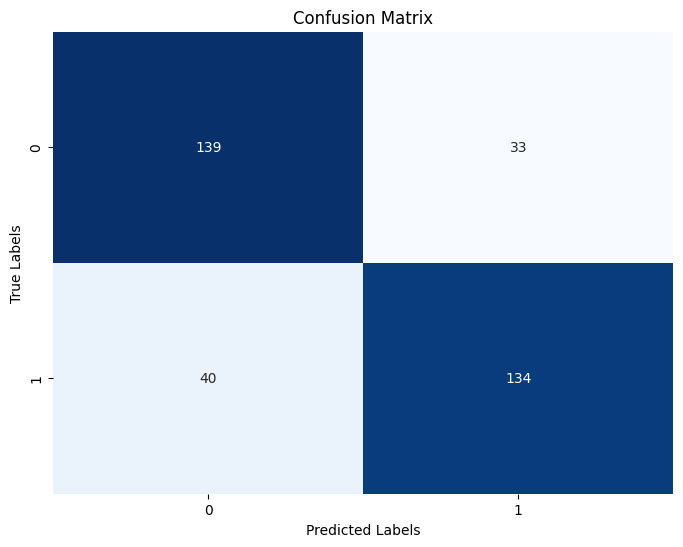

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


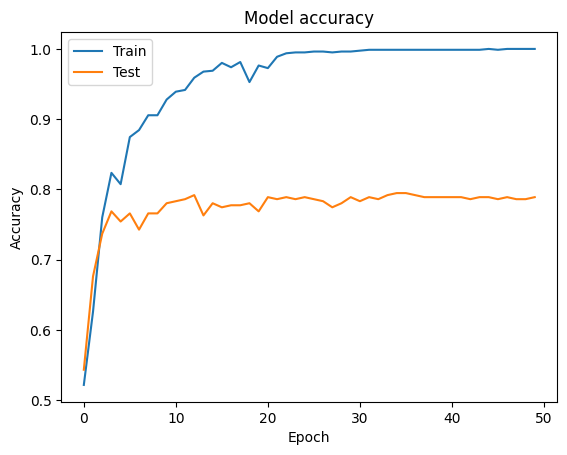

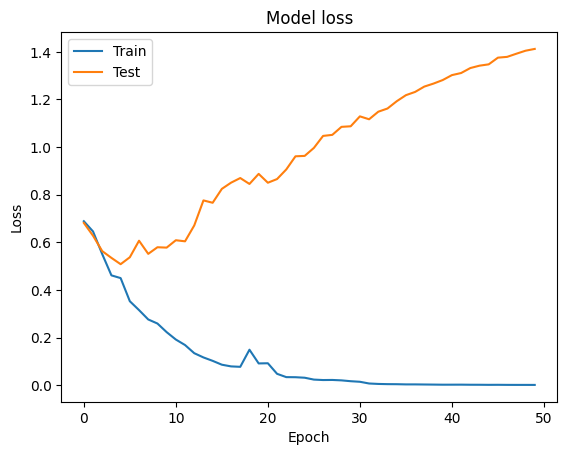

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()